# Task 6 - Prediction using Decision Tree

### Muhammed Sabah

In [48]:
# importing libraries
import os
import pandas as pd
import numpy as np

In [2]:
os.chdir('C:\\Users\\Sabah\\Downloads')

### Reading data

In [7]:
iris = pd.read_csv('Iris.csv' , index_col = 0)

In [8]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### NO null values

In [9]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [10]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


### Checking unique values in Species and mapping them as 1,2,3.. for better classification

In [11]:
np.unique(iris['Species'])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Mapping  'Iris-setosa' = 1, 'Iris-versicolor' = 2 , 'Iris-virginica' = 3

In [12]:
iris['Species'] = iris['Species'].map({'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3})

In [13]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,1
2,4.9,3.0,1.4,0.2,1
3,4.7,3.2,1.3,0.2,1
4,4.6,3.1,1.5,0.2,1
5,5.0,3.6,1.4,0.2,1


In [14]:
## successfully mapped

In [15]:
columns_list = list(iris.columns)

In [16]:
features = list(set(columns_list) - set(['Species']))

In [39]:
sp = ['Iris-setosa','Iris-versicolor','Iris-Virginica']

In [38]:
y = iris['Species'].values

In [18]:
x = iris[features].values

In [19]:
print(x)
print(y)

[[0.2 3.5 1.4 5.1]
 [0.2 3.  1.4 4.9]
 [0.2 3.2 1.3 4.7]
 [0.2 3.1 1.5 4.6]
 [0.2 3.6 1.4 5. ]
 [0.4 3.9 1.7 5.4]
 [0.3 3.4 1.4 4.6]
 [0.2 3.4 1.5 5. ]
 [0.2 2.9 1.4 4.4]
 [0.1 3.1 1.5 4.9]
 [0.2 3.7 1.5 5.4]
 [0.2 3.4 1.6 4.8]
 [0.1 3.  1.4 4.8]
 [0.1 3.  1.1 4.3]
 [0.2 4.  1.2 5.8]
 [0.4 4.4 1.5 5.7]
 [0.4 3.9 1.3 5.4]
 [0.3 3.5 1.4 5.1]
 [0.3 3.8 1.7 5.7]
 [0.3 3.8 1.5 5.1]
 [0.2 3.4 1.7 5.4]
 [0.4 3.7 1.5 5.1]
 [0.2 3.6 1.  4.6]
 [0.5 3.3 1.7 5.1]
 [0.2 3.4 1.9 4.8]
 [0.2 3.  1.6 5. ]
 [0.4 3.4 1.6 5. ]
 [0.2 3.5 1.5 5.2]
 [0.2 3.4 1.4 5.2]
 [0.2 3.2 1.6 4.7]
 [0.2 3.1 1.6 4.8]
 [0.4 3.4 1.5 5.4]
 [0.1 4.1 1.5 5.2]
 [0.2 4.2 1.4 5.5]
 [0.1 3.1 1.5 4.9]
 [0.2 3.2 1.2 5. ]
 [0.2 3.5 1.3 5.5]
 [0.1 3.1 1.5 4.9]
 [0.2 3.  1.3 4.4]
 [0.2 3.4 1.5 5.1]
 [0.3 3.5 1.3 5. ]
 [0.3 2.3 1.3 4.5]
 [0.2 3.2 1.3 4.4]
 [0.6 3.5 1.6 5. ]
 [0.4 3.8 1.9 5.1]
 [0.3 3.  1.4 4.8]
 [0.2 3.8 1.6 5.1]
 [0.2 3.2 1.4 4.6]
 [0.2 3.7 1.5 5.3]
 [0.2 3.3 1.4 5. ]
 [1.4 3.2 4.7 7. ]
 [1.5 3.2 4.5 6.4]
 [1.5 3.1 4.

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns

In [21]:
train_x,test_x,train_y,test_y = train_test_split(x,y, test_size = 0.3 , random_state = 0)

In [49]:
# importing decisiontree classifier from sklearn
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()


In [28]:
## fitting decision tree

dt.fit(train_x,train_y)

DecisionTreeClassifier()

## To visualize the dree

In [25]:
from matplotlib import pyplot as plt
from sklearn import datasets

from sklearn import tree

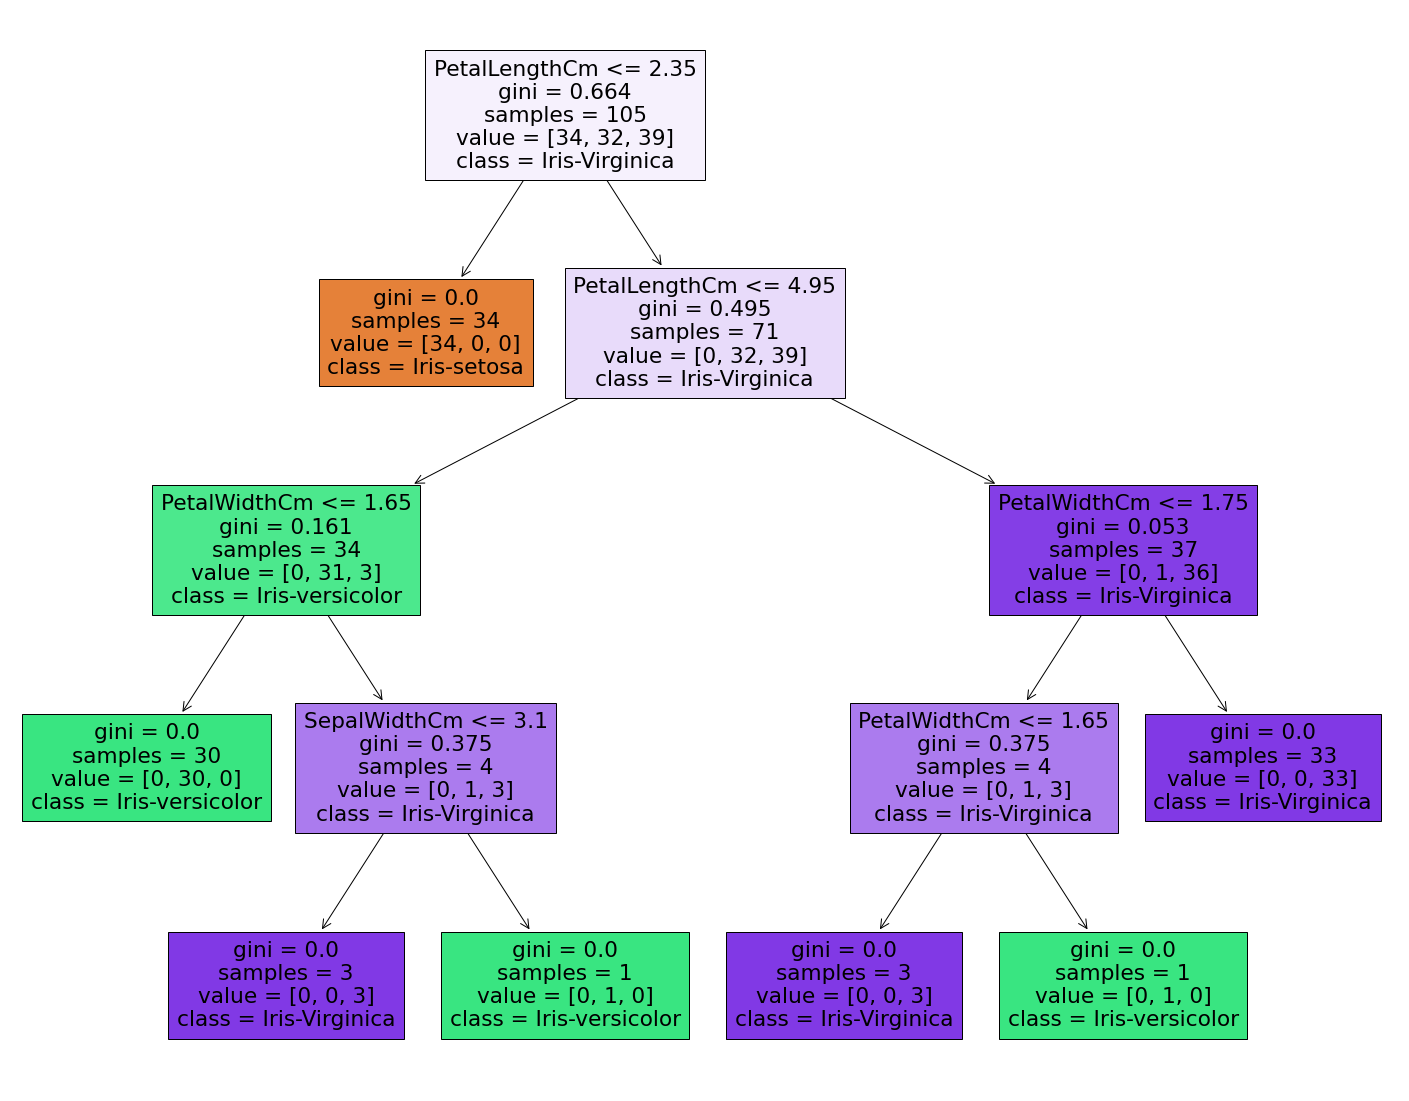

In [44]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=features,  
                   class_names= sp,
                   filled=True)

### Predicting on test data

In [45]:
prediction = dt.predict(test_x)

In [46]:
accuracy = accuracy_score(test_y,prediction)

In [47]:
print(accuracy)

0.9777777777777777


### Our model has 97% accuracy which shows model is good

In [56]:
## The End